In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime 
import seaborn as sns
import matplotlib.ticker as ticker

In [62]:
pwd

'c:\\Users\\Niall.Russell\\OneDrive - University of Limerick\\git files\\PDFA-assignments'

In [63]:
df = pd.read_csv("knock_weather.csv", skiprows = 23)

C:\Users\Niall.Russell\AppData\Local\Temp\ipykernel_16888\1115804893.py:1: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("knock_weather.csv", skiprows = 23)


In [64]:
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,2,5,2,220,,,0.0,,0,8
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,2,5,2,230,,,0.0,,0,8
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,2,4,2,210,,,0.0,,0,8
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,2,6,2,200,,,0.0,,0,8


In [65]:
df["date"] = pd.to_datetime(df["date"])
df["date"]


C:\Users\Niall.Russell\AppData\Local\Temp\ipykernel_16888\1350991997.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: date, Length: 247674, dtype: datetime64[ns]

In [66]:
df = df.assign(new_date=df["date"].dt.date, new_time=df["date"].dt.time, year = df["date"].dt.year)

In [67]:
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,new_date,new_time,year
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,1996-04-10,14:00:00,1996
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,1996-07-31,08:00:00,1996
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,1996-07-31,09:00:00,1996


In [68]:
years = df["year"].unique()
years

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023, 2024])

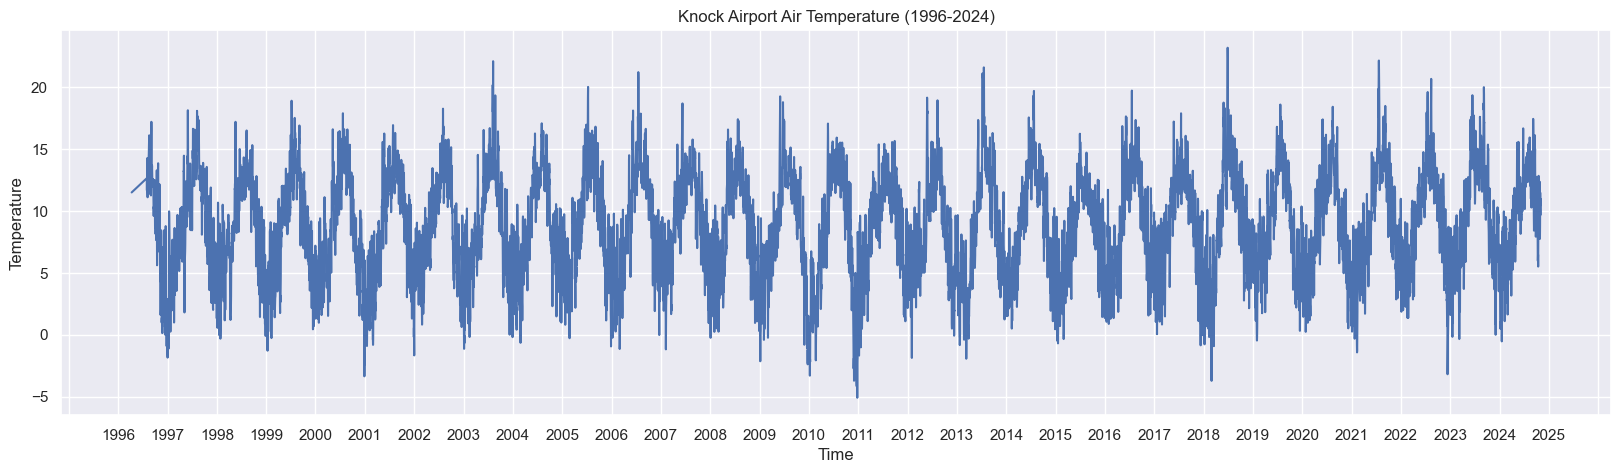

In [69]:
fig = plt.subplots(figsize = (20,5))
sns.lineplot(data = df, x = "new_date", y =  "temp", errorbar = None).set(title = "Knock Airport Air Temperature (1996-2024)", xlabel = "Time", ylabel = "Temperature")

ax = plt.gca()
#plt.margins(x=-.1)
#ax.set_xlim(36,55)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
locator = mdates.YearLocator(1)
#locator.MAXTICKS = 33
ax.xaxis.set_major_locator(locator)
xticks = ax.xaxis.get_major_ticks()
xticks[-1].label1.set_visible(False)
xticks[1].label1.set_visible(False)
#ax.set_xlim([df["new_date"][1996], df["new_date"][2025]])
#ax.set(title = "Knock Airport Air Temperature (1996-2024)", xlabel = "Time", ylabel = "Temperature")
#ax.set_xticks(range(1996,2024))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#plt.xticks(years)
#plt.xticks(np.arange(5), (1996, 2000, 2008, 2016, 2024))
#ax.set_xticks(years)
#sns.set_theme(rc = {'figure.figsize':(20, 5)})
plt.show()

In [70]:
df.head(5)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,new_date,new_time,year
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,1996-04-10,14:00:00,1996
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,1996-07-31,08:00:00,1996
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,1996-07-31,09:00:00,1996
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,25,82,0.0,28000,35,6,1996-07-31,10:00:00,1996
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,2,11,0.0,40000,40,6,1996-07-31,11:00:00,1996


In [73]:
df.set_index("date", inplace = True)
df.head(5)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wddir,ww,w,sun,vis,clht,clamt,new_date,new_time,year
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,...,0,25,81,0.0,35000,32,5,1996-04-10,14:00:00,1996
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,25,82,0.0,40000,45,5,1996-07-31,08:00:00,1996
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,80,81,0.0,8000,32,7,1996-07-31,09:00:00,1996
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,25,82,0.0,28000,35,6,1996-07-31,10:00:00,1996
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,...,0,2,11,0.0,40000,40,6,1996-07-31,11:00:00,1996


In [79]:
meantempdaily = df["temp"].resample("D").mean()
meantempdaily.dropna(inplace=True)
meantempdaily

date
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
                ...    
2024-10-28    11.487500
2024-10-29    10.445833
2024-10-30    10.983333
2024-10-31    10.554167
2024-11-01     9.700000
Name: temp, Length: 10322, dtype: float64

<Axes: xlabel='date', ylabel='temp'>

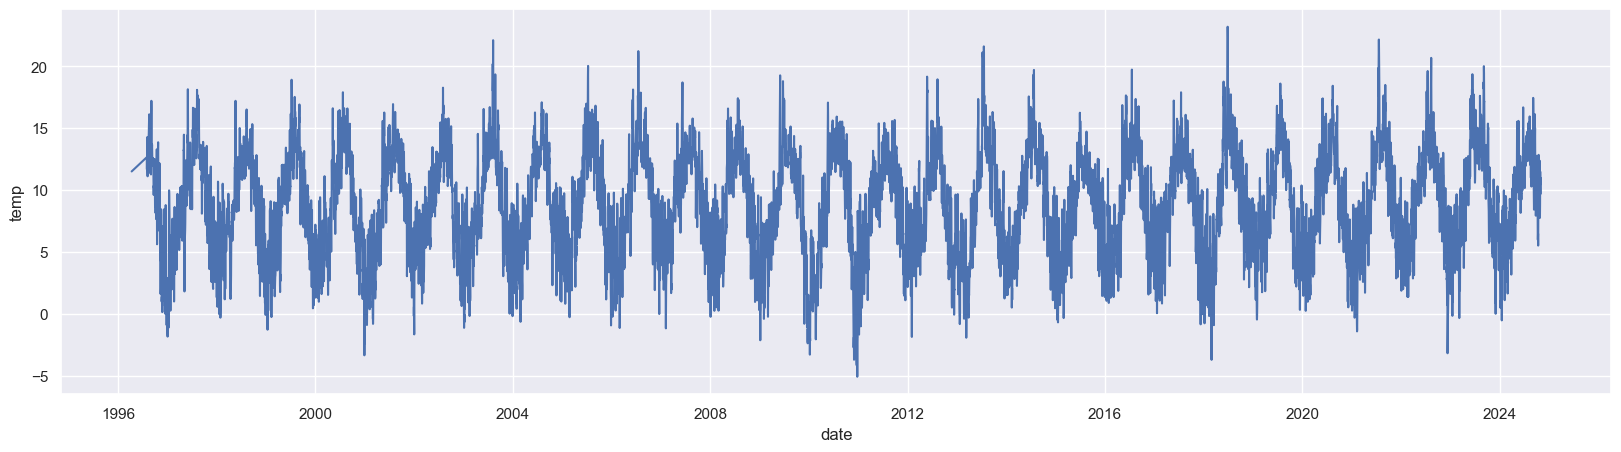

In [80]:
sns.lineplot(data = meantempdaily, errorbar = None)